# Interaction Layout
Apply interaction mapping to Qiskit Staged Pass Manager [layout](https://docs.quantum.ibm.com/api/qiskit/transpiler#layout-stage) using [`AnalysisPass`](https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.AnalysisPass)

In [14]:
from lib.interaction_mapping import InteractionMapping
from lib.interaction_layout import InteractionLayout

In [15]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeLondonV2
from qiskit.transpiler import PassManager, StagedPassManager
from qiskit.transpiler.preset_passmanagers.common import generate_embed_passmanager
from qiskit.converters import circuit_to_dag
from qiskit.visualization import plot_coupling_map, plot_circuit_layout

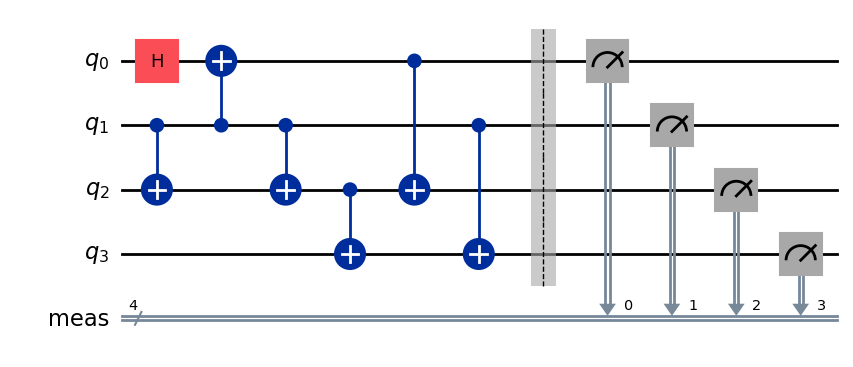

In [16]:
fake_backend = FakeLondonV2()

num_qubits = 4
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.cx(1, 2)

qc.cx(1, 0)
qc.cx(1, 2)
qc.cx(2, 3)

qc.cx(0, 2)
qc.cx(1, 3)

qc.measure_all()
display(qc.draw('mpl'))

dag = circuit_to_dag(qc)

In [17]:
interaction_mapping = InteractionMapping(coupling_map=fake_backend.coupling_map, dag=dag)
best_layout = interaction_mapping.get_best_qpi_layout()
print("Best mapping layout:", best_layout)

Best mapping layout: [(1, 1), (2, 3), (0, 0), (3, 4)]


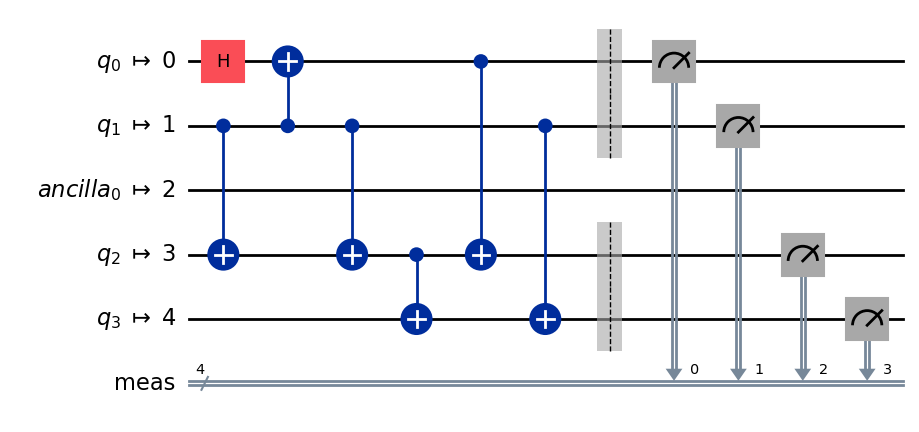

In [18]:
staged_pass = StagedPassManager()

staged_pass.layout = PassManager()
staged_pass.layout += InteractionLayout(coupling_map=fake_backend.coupling_map, initial_map=best_layout)
staged_pass.layout += generate_embed_passmanager(fake_backend.coupling_map)

interaction_isa = staged_pass.run(qc)
display(interaction_isa.draw('mpl'))

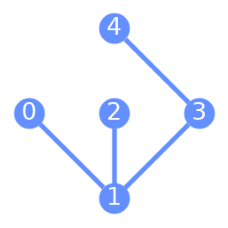

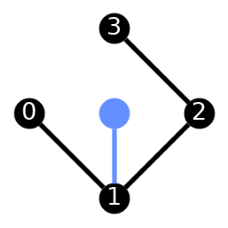

In [19]:
coordinates = [[1, 0], [0, 1], [1, 1], [1, 2], [2, 1]]
display(plot_coupling_map(num_qubits=fake_backend.num_qubits, qubit_coordinates=coordinates, coupling_map=fake_backend.coupling_map.get_edges()))
display(plot_circuit_layout(interaction_isa, fake_backend, view='virtual'))